In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

# Configuration
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

# Conversor SEPIC

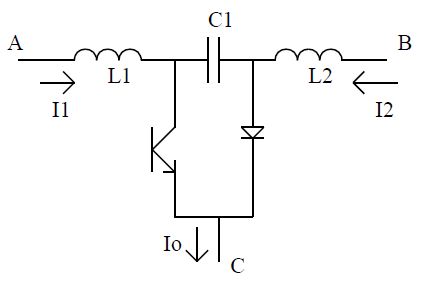

In [2]:
display(Image("cir1.png"))

## Característica estática

Condiderando a topologia apresentada e as características do circuito (tensão de entrada aplicada entre A-B, tensão de saída entre C-B, temos que:

Quando o transistor está conduzindo (por $\delta\tau$):
$$
I(C_1) = -I_2
$$

Quando o diodo está conduzindo (por $(1 - \delta) \tau$):
$$
I(C_1) = I_1
$$

Então:
$$
I1 \cdot (1 - \delta) \tau = I_2 \cdot \delta\tau
$$

$$
\implies I_1 = \frac{I_2 \delta}{\delta - 1}
$$

Pela conservação da energia, podemos igualar a potencia inicial e final:

$$
W_o = W_i  \implies V_o \cdot I_o = E \cdot I_1 \implies V_o \cdot (I_1 + I_2) = E \cdot I_1
$$

Assim a característica estática é:

$$
\frac{V_o}{E} = \frac{I_1}{I_1 + I_2} = \delta
$$



## Grandezas

Temos que:

$$
W_o = \frac{V_o^2}{R_o}
$$

Como $V_o = E \cdot \delta$ então:

$$
V_o = 0.5 \cdot 300 = 150~\text{V}$$

e então:

$$W_i = W_o = \frac{150^2}{100} = 225~\text{W}$$

Da conservação acima:

$$
W_i = I_1 \cdot E = 300 I_1 \implies I_1 = 0.75~\text{A}
$$

Da fórmula acima temos:

$$
I_1 = \frac{I_2 \cdot 0.5}{0.5 - 1} = - I_2
$$

Então:

$$|I_2| = 0.75~\text{A}$$

# Conversor cc-cc isolado

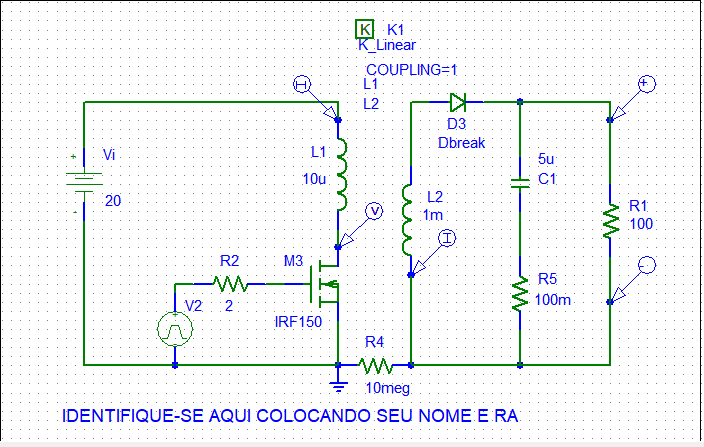

In [3]:
display(Image("cir2.png"))

Circuito em ngspice:

In [4]:
! cat netlist.cir

.param K = 1

Vi vpp 0 dc 20
V2 1 0 dc 0 pulse(-15 15 0 100n 100n 20u 40u)
R2 1 g 2
X1 d g 0 irf150
R4 vn 0 10meg
L1 d vpp 10u
L2 vn 2 1m
V1 3 2 dc 0
D3 3 vp 1n4002
C1 vp 4 5u
R5 4 vn 100m
R1 vp vn 100
K1 L1 L2 K


Infelizmente, desta vez, por mais que eu tenha mudado o valor de temperatura, passo recomendado, tempo inicial, etc., não foi possível resolver os problemas de convergência do SPICE (apresentados nos anexos).

## K = 1

In [5]:
vo = np.genfromtxt('data/01-vo.csv')
vl1 = np.genfromtxt('data/01-vl1.csv')
il1 = np.genfromtxt('data/01-il1.csv')
il2 = np.genfromtxt('data/01-il2.csv')
vds = np.genfromtxt('data/01-vds.csv')

In [6]:
 import scipy.signal as signal

# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.3 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
vo_smooth = signal.filtfilt(B,A, vo[:,1])

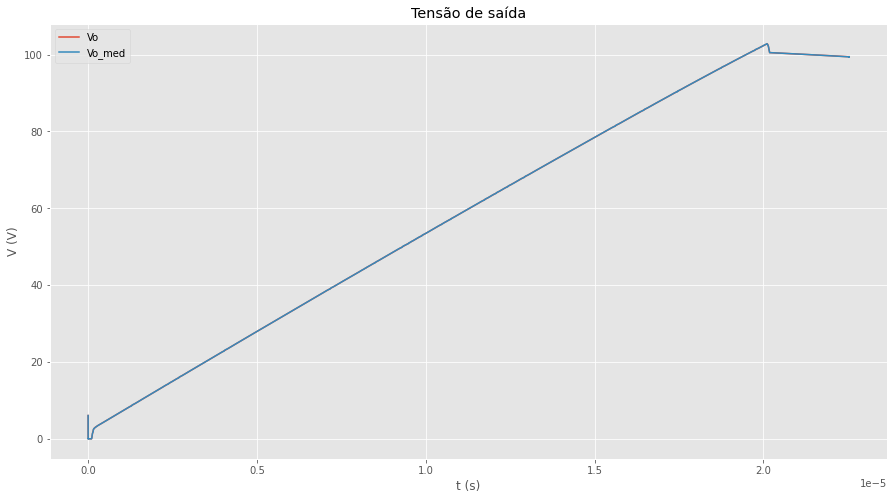

In [7]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vo[:,0], vo[:,1])
ax1.plot(vo[:,0], vo_smooth[:])
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vo', 'Vo_med'])
ax1.set_title("Tensão de saída")
plt.show()

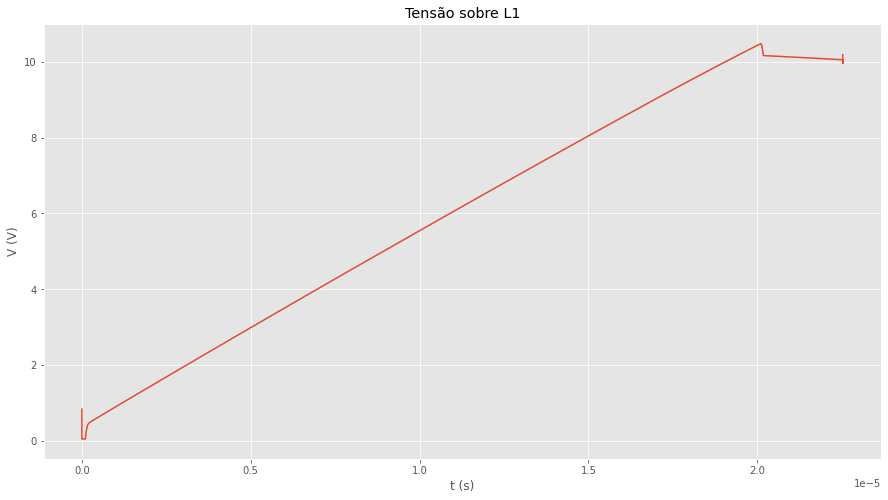

In [8]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vl1[:,0], vl1[:,1])
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.set_title("Tensão sobre L1")
plt.show()

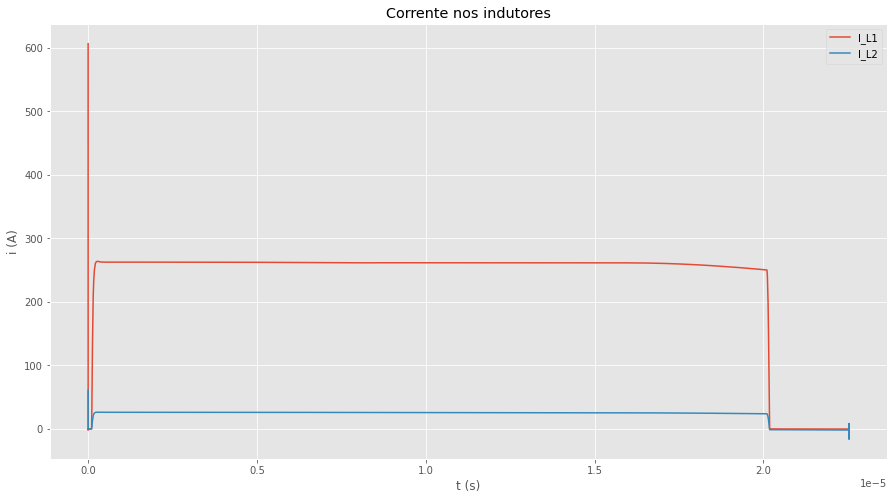

In [9]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(il1[:,0], il1[:,1])
ax1.plot(il2[:,0], il2[:,1])
ax1.set_ylabel("i (A)")
ax1.set_xlabel("t (s)")
ax1.legend(['I_L1', 'I_L2'])
ax1.set_title("Corrente nos indutores")
plt.show()

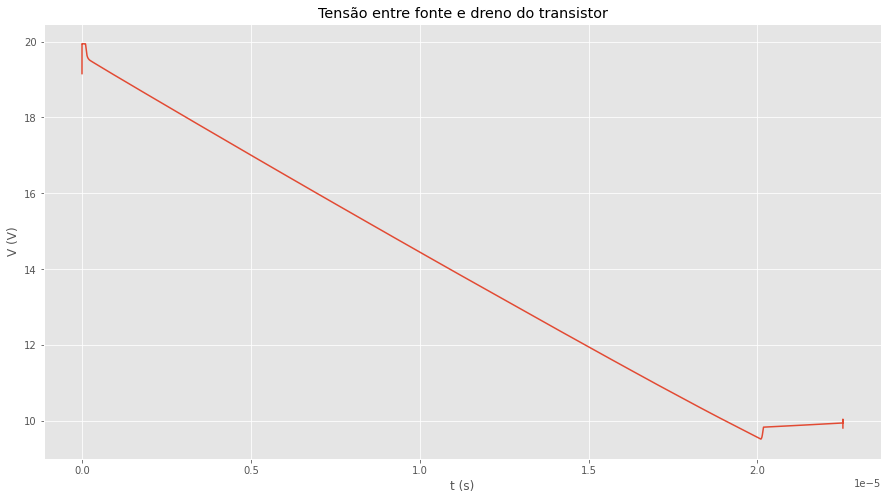

In [10]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vds[:,0], vds[:,1])
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.set_title("Tensão entre fonte e dreno do transistor")
plt.show()

## K = .95

In [11]:
vo = np.genfromtxt('data/02-vo.csv')
vl1 = np.genfromtxt('data/02-vl1.csv')
il1 = np.genfromtxt('data/02-il1.csv')
il2 = np.genfromtxt('data/02-il2.csv')
vds = np.genfromtxt('data/02-vds.csv')

In [12]:
 import scipy.signal as signal

# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.3 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
vo_smooth = signal.filtfilt(B,A, vo[:,1])

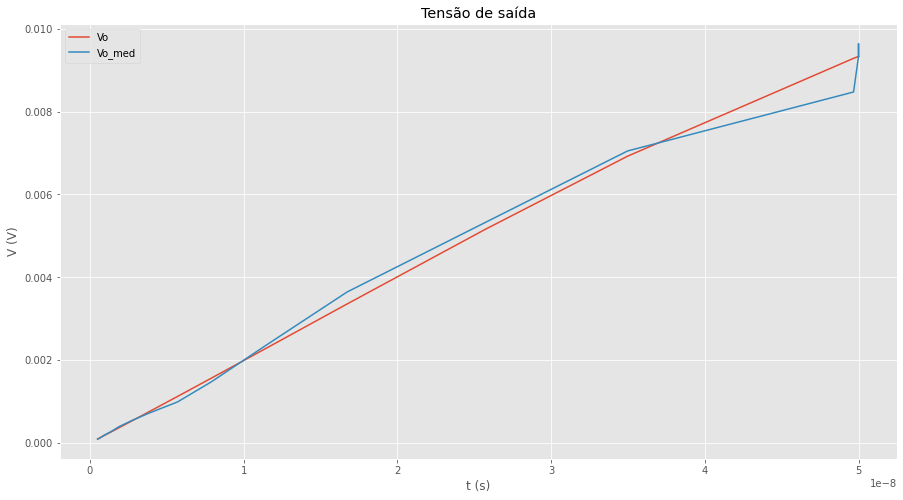

In [13]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vo[:,0], vo[:,1])
ax1.plot(vo[:,0], vo_smooth[:])
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vo', 'Vo_med'])
ax1.set_title("Tensão de saída")
plt.show()

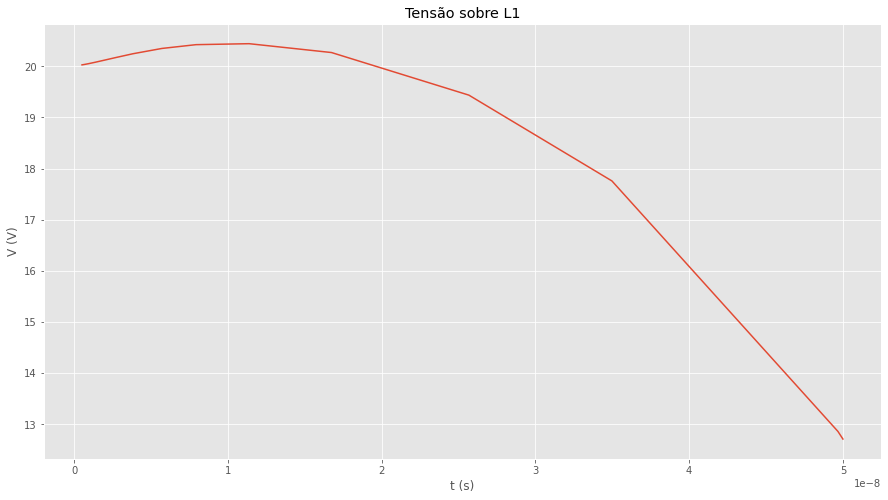

In [14]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vl1[:,0], vl1[:,1])
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.set_title("Tensão sobre L1")
plt.show()

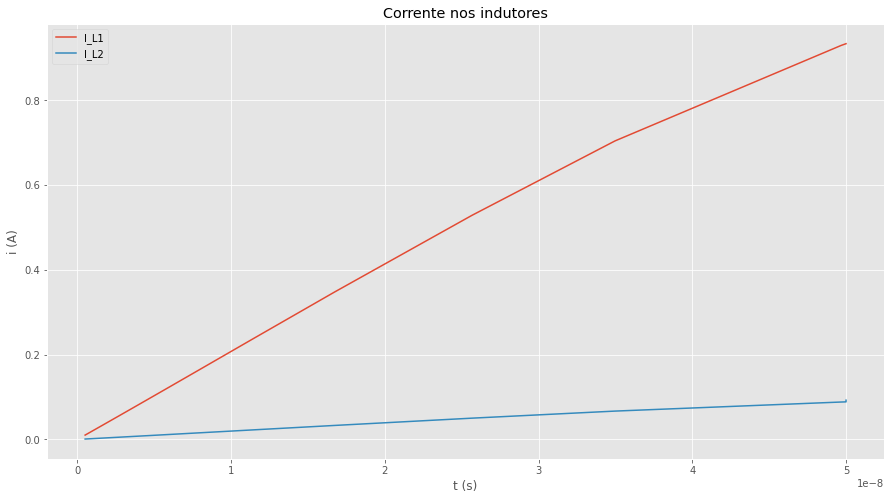

In [15]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(il1[:,0], il1[:,1])
ax1.plot(il2[:,0], il2[:,1])
ax1.set_ylabel("i (A)")
ax1.set_xlabel("t (s)")
ax1.legend(['I_L1', 'I_L2'])
ax1.set_title("Corrente nos indutores")
plt.show()

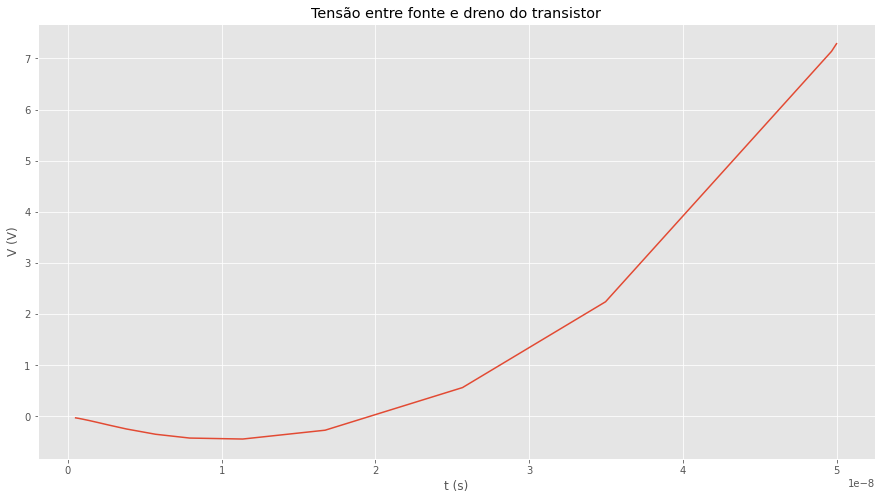

In [16]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vds[:,0], vds[:,1])
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.set_title("Tensão entre fonte e dreno do transistor")
plt.show()

# Anexos {-}

Arquivos utilizados e gerados para e na simulação:

In [17]:
%%bash
echo "Modelo de transistor MOS:"
echo ""
echo "irf150.cir:"
echo "======="
echo ""
cat ../models/irf150.cir

Modelo de transistor MOS:

irf150.cir:

* from: http://www.irf.com/part/100V-SINGLE-N-CHANNEL-HI-REL-MOSFET-IN-A-TO-204AE-PACKAGE/_/A~IRF150 

.SUBCKT irf150 1 2 3
**************************************
*      Model Generated by MODPEX     *
*Copyright(c) Symmetry Design Systems*
*         All Rights Reserved        *
*    UNPUBLISHED LICENSED SOFTWARE   *
*   Contains Proprietary Information *
*      Which is The Property of      *
*     SYMMETRY OR ITS LICENSORS      *
*Commercial Use or Resale Restricted *
*   by Symmetry License Agreement    *
**************************************
* Model generated on Dec 17, 96
* MODEL FORMAT: SPICE3
* Symmetry POWER MOS Model (Version 1.0)
* External Node Designations
* Node 1 -> Drain
* Node 2 -> Gate
* Node 3 -> Source
M1 9 7 8 8 MM L=100u W=100u
* Default values used in MM:
* The voltage-dependent capacitances are
* not included. Other default values are:
*   RS=0 RD=0 LD=0 CBD=0 CBS=0 CGBO=0
.MODEL MM NMOS LEVEL=1 IS=1e-32
+VTO=4.07861 LAMBD

In [18]:
%%bash
echo "Modelo de transistor MOS:"
echo ""
echo "1n4002.cir:"
echo "======="
echo ""
cat ../models/1n4002.cir

Modelo de transistor MOS:

1n4002.cir:

* MODEL
.model 1N4002 D (Is=14.11n N=1.984 Rs=33.89E-3 Ikf=94.81 Xti=3 Eg=1.110 Cjo=51.17E-12 M=.2762 Vj=.3905 Fc=.5 Isr=100.0E-12 Nr=2 Bv=100.1 Ibv=10 Tt=4.761E-6 mfg=GI)



In [19]:
%%bash
echo "ex1.cir"
echo "======="
echo ""
cat ex1.cir

ex1.cir

DC-DC insulated conversor

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control

tran 50n 2m uic

option numdgt=4
wrdata data/01-vo.csv vr(vp)-vr(vn)
wrdata data/01-vl1.csv vr(vpp)-vr(d)
wrdata data/01-il1.csv -i(vi)
wrdata data/01-il2.csv -i(v1)
wrdata data/01-vds.csv vr(d)

.endc

* END
.end


In [20]:
%%bash
echo "01.out"
echo "======="
echo ""
cat data/01.out

01.out


Circuit: dc-dc insulated conversor

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
doAnalyses: TRAN:  Timestep too small; time = 2.25328e-05, timestep = 6.25e-20: trouble with node "vn"


tran simulation(s) aborted
Note: No ".plot", ".print", or ".fourier" lines; no simulations run


In [21]:
%%bash
echo "ex2.cir"
echo "======="
echo ""
cat ex2.cir

ex2.cir

DC-DC insulated conversor

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control

alterparam K = 0.95

reset

tran 50n 2m uic

option numdgt=4
wrdata data/02-vo.csv vr(vp)-vr(vn)
wrdata data/02-vl1.csv vr(vpp)-vr(d)
wrdata data/02-il1.csv -i(vi)
wrdata data/02-il2.csv -i(v1)
wrdata data/02-vds.csv vr(d)

.endc

* END
.end


In [22]:
%%bash
echo "02.out"
echo "======="
echo ""
cat data/02.out

02.out


Circuit: dc-dc insulated conversor

Reset re-loads circuit dc-dc insulated conversor

Circuit: dc-dc insulated conversor

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
doAnalyses: TRAN:  Timestep too small; time = 5e-08, timestep = 6.25e-20: trouble with node "vn"


tran simulation(s) aborted
Note: No ".plot", ".print", or ".fourier" lines; no simulations run
